In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# 过拟合和欠拟合


机器学习的根本问题是优化与泛化之间的对立。“优化”是指对一个模型进行调整以获得对训练数据的最佳性能的过程(“机器学习”中的“学习”)，而“泛化”是指经过训练的模型对它以前从未见过的数据上性能的好坏。机器学习的目标当然是获得良好的泛化，但是你不能控制泛化，你只能根据它的训练数据来调整模型。

在训练开始时，优化和泛化是相关的：训练数据的损失越小，测试数据的损失也越小。当这种情况发生的时候，你的模型被认为欠拟合的，网络还没有对训练数据所有模式进行建模。但是，在对训练数据进行了一定次数的迭代之后，泛化不再提高，验证先是不变，然后开始退化：模型开始变得过拟合。

为了防止出现过拟合，最优解决方法是获取更多的训练数据。对更多数据进行训练的模型自然会得到更好的泛化能力。下一个最好的解决方案是调整模型允许存储的信息量，或对允许存储的信息添加约束。如果一个网络只能记住少量的模式，那么优化过程就会迫使它把注意力集中在最突出的模式上，这样更可能得到良好的泛化。

这种降低过拟合的方法叫做正则化

In [7]:
# 加载数据
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 减小网络大小
防止过拟合的最简单方法是减小模型的大小，即模型中可学习参数的数目(由层数和每层单元数决定)。在深度学习中，模型中可学习参数的个数常被称为模型的“容量”。直观地说，一个参数较多的模型具有更多的“记忆能力”，因此能够很容易地学习到训练样本与目标之间的一种完美的字典式映射，这种映射泛化能力很差。例如，一个包含50万个二进制参数的模型可以很容易地学习MNIST训练集中每一个数字的类：我们只需要对50,000个数字都对应10个二进制参数。这样的模型对于分类新的数字样本是无用的。永远记住这一点：深度学习模型往往适合训练数据，但真正的挑战是泛化，而不是拟合。


In [3]:
# 4-3原始模型
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
# 4-4容量更小的模型
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

# 
这里比较了原始网络和小型网络的验证损失。点是较小网络的验证损失值，交叉是初始网络的(验证损失越低，模型越好)。

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 11s 442us/sample - loss: 0.4546 - acc: 0.8168 - val_loss: 0.3514 - val_acc: 0.8672
Epoch 2/20
25000/25000 [==============================] - 6s 254us/sample - loss: 0.2568 - acc: 0.9092 - val_loss: 0.3053 - val_acc: 0.8774
Epoch 3/20
25000/25000 [==============================] - 7s 263us/sample - loss: 0.1972 - acc: 0.9295 - val_loss: 0.2930 - val_acc: 0.8829
Epoch 4/20
25000/25000 [==============================] - 4s 174us/sample - loss: 0.1674 - acc: 0.9393 - val_loss: 0.3026 - val_acc: 0.8808
Epoch 5/20
25000/25000 [==============================] - 4s 149us/sample - loss: 0.1405 - acc: 0.9510 - val_loss: 0.3249 - val_acc: 0.8765
Epoch 6/20
25000/25000 [==============================] - 4s 155us/sample - loss: 0.1267 - acc: 0.9561 - val_loss: 0.3343 - val_acc: 0.8763
Epoch 7/20
25000/25000 [==============================] - 4s 148us/sample - loss: 0.1078 - acc: 0.9648 - val_

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 215us/sample - loss: 0.5739 - acc: 0.7990 - val_loss: 0.4868 - val_acc: 0.8498
Epoch 2/20
25000/25000 [==============================] - 3s 133us/sample - loss: 0.4041 - acc: 0.8820 - val_loss: 0.3778 - val_acc: 0.8738
Epoch 3/20
25000/25000 [==============================] - 3s 129us/sample - loss: 0.3078 - acc: 0.9016 - val_loss: 0.3206 - val_acc: 0.8834
Epoch 4/20
25000/25000 [==============================] - 3s 131us/sample - loss: 0.2513 - acc: 0.9161 - val_loss: 0.2925 - val_acc: 0.8887
Epoch 5/20
25000/25000 [==============================] - 3s 130us/sample - loss: 0.2156 - acc: 0.9261 - val_loss: 0.2803 - val_acc: 0.8909
Epoch 6/20
25000/25000 [==============================] - 3s 124us/sample - loss: 0.1914 - acc: 0.9344 - val_loss: 0.2781 - val_acc: 0.8890
Epoch 7/20
25000/25000 [==============================] - 3s 122us/sample - loss: 0.1729 - acc: 0.9403 - val_l

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

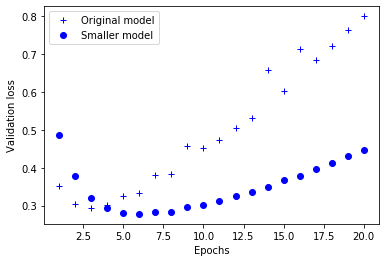

In [9]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 
较小的网络开始过拟合比原网络晚(在6个迭代之后，而不是在4个迭代之后)，当它开始过度拟合时，它的性能下降要慢得多。

现在，让我们在这个基准测试中添加一个具有更大容量的网络，这个网络的容量远远超过问题所需要的：

In [10]:
# 4-5容量更大的模型
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [11]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 215us/sample - loss: 0.4794 - acc: 0.8093 - val_loss: 0.2829 - val_acc: 0.8829
Epoch 2/20
25000/25000 [==============================] - 4s 141us/sample - loss: 0.2237 - acc: 0.9101 - val_loss: 0.3019 - val_acc: 0.8765
Epoch 3/20
25000/25000 [==============================] - 3s 133us/sample - loss: 0.1226 - acc: 0.9542 - val_loss: 0.3593 - val_acc: 0.8844
Epoch 4/20
25000/25000 [==============================] - 3s 129us/sample - loss: 0.0596 - acc: 0.9812 - val_loss: 1.0745 - val_acc: 0.7686
Epoch 5/20
25000/25000 [==============================] - 4s 146us/sample - loss: 0.0309 - acc: 0.9901 - val_loss: 0.6354 - val_acc: 0.8760
Epoch 6/20
25000/25000 [==============================] - 3s 139us/sample - loss: 0.1189 - acc: 0.9888 - val_loss: 0.5451 - val_acc: 0.8803
Epoch 7/20
25000/25000 [==============================] - 3s 135us/sample - loss: 7.3417e-04 - acc: 1.0000 - v

# 
与原始网络相比，更大的网络如下所示。点是较大网络的验证损失值，交叉是原始网络。

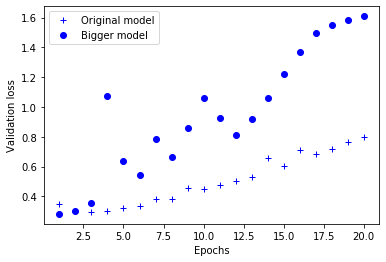

In [12]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

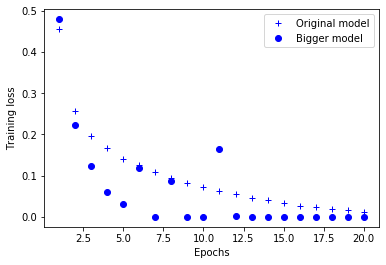

In [13]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

# 加权正则化

“简单模型”其中参数值的分布具有较小的熵(或者像我们在上面一节中看到的那样，一个参数较少的模型)。因此，减少过度拟合的一个常见方法是限制网络的复杂性，强制其权重只取较小的值，从而使权重值的分布更加“规则”。这被称为“加权正则化”，它是通过增加网络的损失函数来实现的。

L1正则化，其中所增加的成本与权重系数绝对值(权值的“L1范数”)成正比。
L2正则化，其中所增加的成本与权重系数值的平方(权值的“L2范数”)成正比。L2正则化也叫 权重衰减。
在Keras中，权重正则化是通过传递正则化实例层作为关键字参数。

In [14]:
# 4-6添加L2权重正则化
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

# 
L2(0.001)意味着该层的权重矩阵的每个系数都会使网络总损失增加0.001 * weight_coefficient_value。 由于惩罚项只在训练时添加，所以这个网络的训练损失会比测试损失大很多。

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 167us/sample - loss: 0.4967 - acc: 0.8232 - val_loss: 0.3813 - val_acc: 0.8814
Epoch 2/20
25000/25000 [==============================] - 3s 135us/sample - loss: 0.3176 - acc: 0.9020 - val_loss: 0.3468 - val_acc: 0.8794
Epoch 3/20
25000/25000 [==============================] - 3s 129us/sample - loss: 0.2716 - acc: 0.9195 - val_loss: 0.3370 - val_acc: 0.8828
Epoch 4/20
25000/25000 [==============================] - 3s 119us/sample - loss: 0.2491 - acc: 0.9278 - val_loss: 0.3420 - val_acc: 0.8815
Epoch 5/20
25000/25000 [==============================] - 3s 125us/sample - loss: 0.2348 - acc: 0.9330 - val_loss: 0.3482 - val_acc: 0.8808
Epoch 6/20
25000/25000 [==============================] - 3s 120us/sample - loss: 0.2272 - acc: 0.9360 - val_loss: 0.3448 - val_acc: 0.8833
Epoch 7/20
25000/25000 [==============================] - 3s 121us/sample - loss: 0.2180 - acc: 0.9413 - val_l

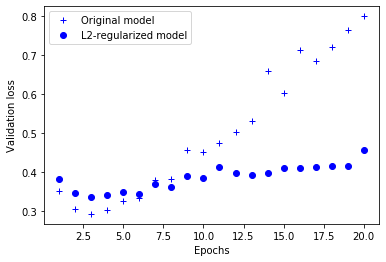

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 添加dropout正则化
dropout时神经网络最有效也最常用的正则化方法之一，对某一层使用dropout，就是在训练过程中随机将该层的一些输出特征舍弃。假设某一层返回值应该是向量[0.2, 0.5, 1.3, 0.8]，使用dropout后，这个向量会变成[0, 0.5, 0, 0.8]。其中会有几个随机的元素变成0。dropout比率是被设为0的特征的所占的比例，通常在0.2-0.5范围内。



In [25]:
# 4-8向网络中添加dropout
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [26]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 219us/sample - loss: 0.5779 - acc: 0.7012 - val_loss: 0.4295 - val_acc: 0.8623
Epoch 2/20
25000/25000 [==============================] - 3s 138us/sample - loss: 0.4314 - acc: 0.8194 - val_loss: 0.3261 - val_acc: 0.8816
Epoch 3/20
25000/25000 [==============================] - 3s 133us/sample - loss: 0.3499 - acc: 0.8657 - val_loss: 0.2873 - val_acc: 0.8882
Epoch 4/20
25000/25000 [==============================] - 3s 122us/sample - loss: 0.2986 - acc: 0.8901 - val_loss: 0.2890 - val_acc: 0.8857
Epoch 5/20
25000/25000 [==============================] - 3s 125us/sample - loss: 0.2600 - acc: 0.9083 - val_loss: 0.2827 - val_acc: 0.8882
Epoch 6/20
25000/25000 [==============================] - 3s 125us/sample - loss: 0.2313 - acc: 0.9208 - val_loss: 0.2851 - val_acc: 0.8884
Epoch 7/20
25000/25000 [==============================] - 3s 124us/sample - loss: 0.2078 - acc: 0.9311 - val_l

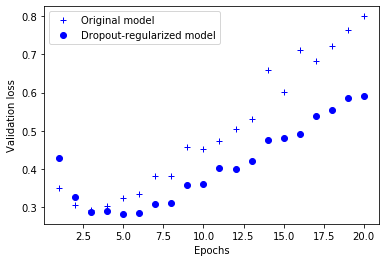

In [27]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 总结
机器学习的通用工作流程
1 定义问题，收集数据集
2 选择衡量成功的指标
3 确定评估方法 （留出验证集 K折交叉验证 重复的K折验证）
4 准备数据 （数据预处理：向量化 值标准化 处理缺失值）
5 开发比基准更好的模型 （三个关键参数：最后一层的激活 损失函数 优化配置）
6 扩大模型规模：开发过拟合的模型
7 模型正则化与调节超参数（防止过拟合方法： 获取更多的数据 减小网络容量 添加权重正则化 添加dropout）

正确选择最后一层激活和损失函数                                                                          
二分类问题         sigmoid    binary_crossentropy                                                           
多分类  多标签问题    softmax    categorical_crossentropy                                                       
多分类  单标签问题    sigmoid    binary_crossentropy                                                          
回归到任意值        无       mse                                                                     
回归到0-1范围内的值   sigmoid    mse或binary_crossentropy                                                       